# Проект 2

# Библиотеки 

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from matplotlib import pylab
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import FastICA

Загрузка данных 

In [196]:
Data_wine = pd.read_csv('winequality-red.csv', delimiter=',', encoding = 'utf-8')
Data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [197]:
Data_wine.columns[0]

'fixed acidity'

# Описание

По 11 признакам (содержание алкоголя, содержание сахара и т.д.) необходимо определить качество вина 

In [198]:
np.unique(Data_wine['quality'].values) 

array([3, 4, 5, 6, 7, 8], dtype=int64)

Видно, что существует 6 типов (классов) качества вина от 3 до 8 

In [199]:
Data_wine_val=Data_wine.values
Data_wine_val=Data_wine_values[:,:-1]
Data_wine_val

array([[7.4    , 0.7    , 0.     , ..., 0.9978 , 3.51   , 0.56   ],
       [7.8    , 0.88   , 0.     , ..., 0.9968 , 3.2    , 0.68   ],
       [7.8    , 0.76   , 0.04   , ..., 0.997  , 3.26   , 0.65   ],
       ...,
       [6.3    , 0.51   , 0.13   , ..., 0.99574, 3.42   , 0.75   ],
       [5.9    , 0.645  , 0.12   , ..., 0.99547, 3.57   , 0.71   ],
       [6.     , 0.31   , 0.47   , ..., 0.99549, 3.39   , 0.66   ]])

In [200]:
label=np.unique(Data_wine['quality'].values)
quality= Data_wine.quality.values

# Построение графиков

In [201]:
def Drawing (Data_wine_val,a,b,f):
    fig = plt.figure(figsize=(8, 8))
    colors = ['navy', 'turquoise', 'darkorange','red','black',
         'green','yellow','purple','grey']
    for color, i, target_name in zip(colors, label, label): 
        plt.scatter(Data_wine_val[quality==i,a],
                    Data_wine_val[quality==i,b], 
                    color=color, alpha=1, lw=7,
                   label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints = 1 )
    plt.axis("equal")
    plt.title(f)
    plt.xlabel(Data_wine.columns[a])
    plt.ylabel(Data_wine.columns[b])

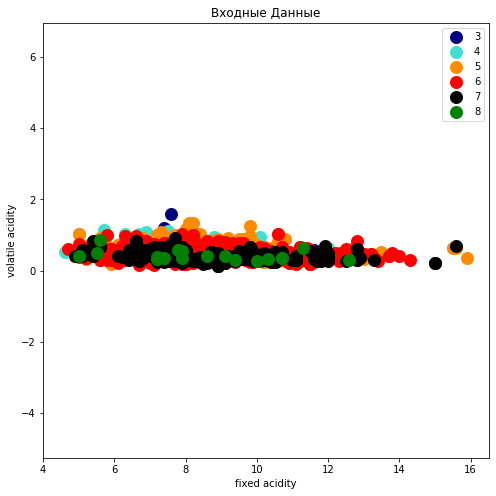

In [202]:
Drawing (Data_wine_val,0,1, "Входные Данные")

Как видно данные плохо разделены, попробуем построить другие проекции и посмотреть что там 

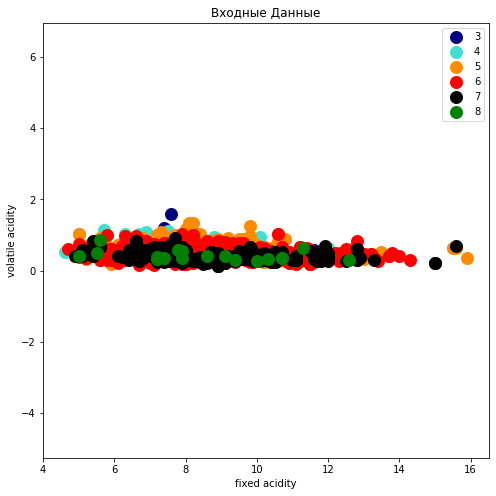

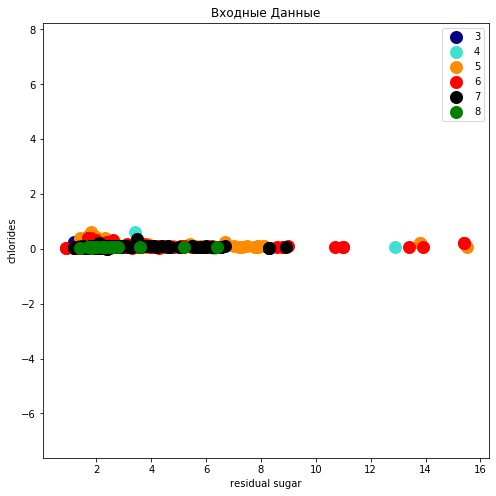

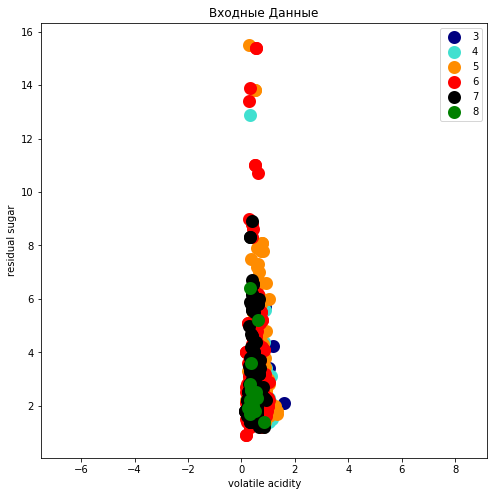

In [203]:
Drawing (Data_wine_val,0,1, "Входные Данные")
Drawing (Data_wine_val,3,4, "Входные Данные")
Drawing (Data_wine_val,1,3, "Входные Данные")

Как видно из других проекций данные скомканы в одном месте 

Попробуем отобразить данные в 3D, посморрим что получится 

# Построение 3D

In [204]:
def Drawing_3D (Data_wine_val, a,b,c,d,f,e):
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=a, azim=b)
    colors = ['navy', 'turquoise', 'darkorange','red','black',
         'green','yellow','purple','grey']
    
    for name, label in [('3', 3), ('4', 4), ('5', 5),('6', 6), ('7', 7), ('8', 8)]:
        ax.text3D(Data_wine_val[quality == label, c].mean(),
                  Data_wine_val[quality == label, d].mean() + 1.0,
                  Data_wine_val[quality == label, f].mean(), name,
                  horizontalalignment='center')
    for i in [3,4,5,6,7,8]:
        ax.scatter(Data_wine_val[quality==i,c], 
                   Data_wine_val[quality==i,d], 
                   Data_wine_val[quality==i,f], c=colors[i], s=50, cmap=plt.cm.spring, alpha=1, edgecolor='black')
    ax.set_xlabel(Data_wine.columns[c])
    ax.set_ylabel(Data_wine.columns[d])
    ax.set_zlabel(Data_wine.columns[f])
    plt.title(e)

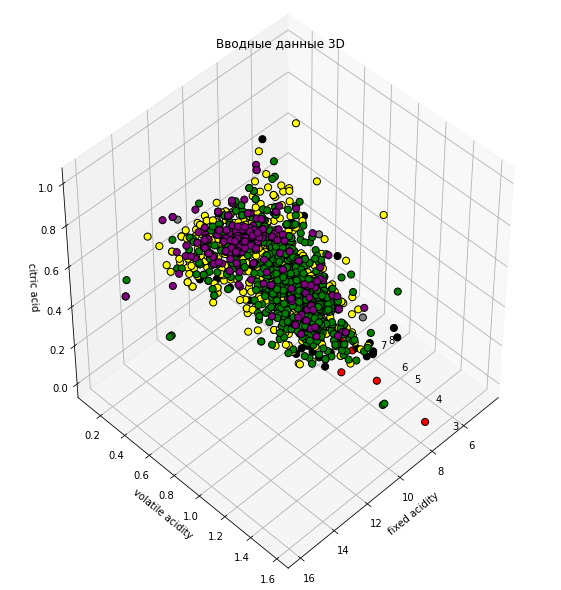

In [205]:
Drawing_3D (Data_wine_val, 45, 45, 0,1,2, "Вводные данные 3D")

Как видно из графика в трехмерной проекции ничего не изменилось 

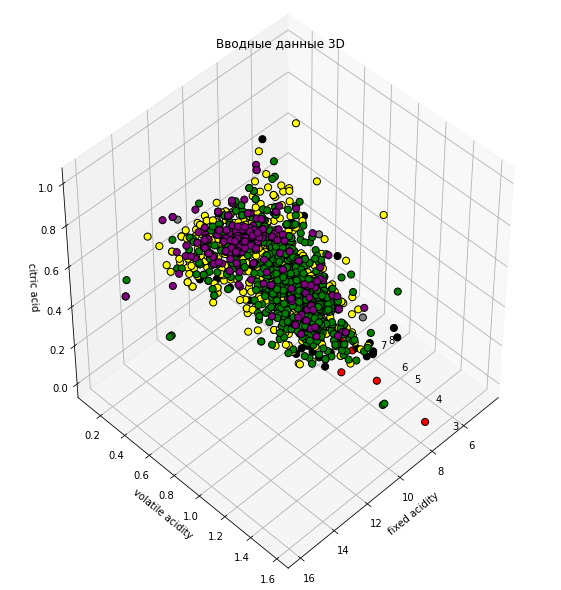

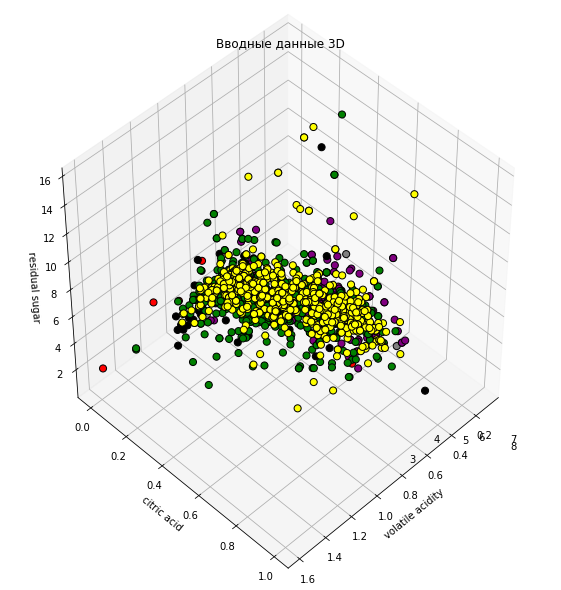

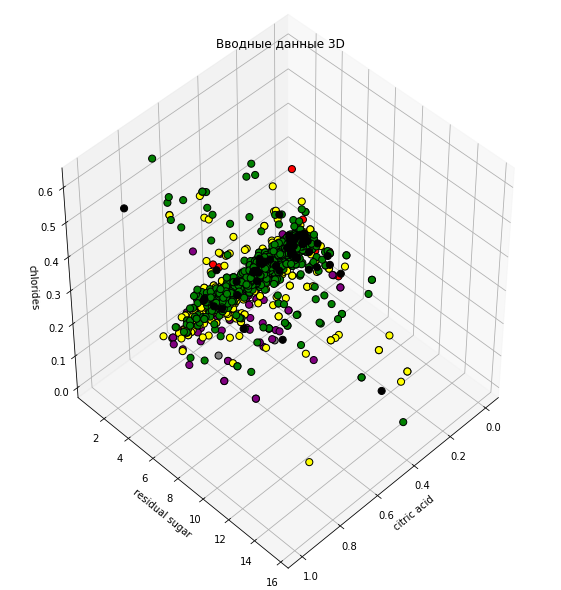

In [206]:
Drawing_3D (Data_wine_val, 45, 45, 0,1,2, "Вводные данные 3D")
Drawing_3D (Data_wine_val, 45, 45, 1,2,3, "Вводные данные 3D")
Drawing_3D (Data_wine_val, 45, 45, 2,3,4, "Вводные данные 3D")

Обработаем их с помощью методов PCA, Kernel PCA, FastICA, FactorAnalysis

# Применим PCA

In [207]:
pca = PCA(n_components=10, svd_solver='full')
Wine_pca = pca.fit_transform(Data_wine_val) 
print(pca.explained_variance_ratio_)

[9.47437021e-01 4.84041280e-02 2.58766116e-03 1.49502894e-03
 3.68759247e-05 1.94364121e-05 9.94746014e-06 8.60602712e-06
 1.29426990e-06 1.09432370e-09]


In [208]:
def Drawing_component (Data_wine_val,a,b,f, o, p):
    fig = plt.figure(figsize=(8, 8))
    colors = ['navy', 'turquoise', 'darkorange','red','black',
         'green','yellow','purple','grey']
    for color, i, target_name in zip(colors, label, label): 
        plt.scatter(Data_wine_val[quality==i,a],
                    Data_wine_val[quality==i,b], 
                    color=color, alpha=1, lw=7,
                   label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints = 1 )
    plt.axis("equal")
    plt.title(f)
    plt.xlabel(o)
    plt.ylabel(p)

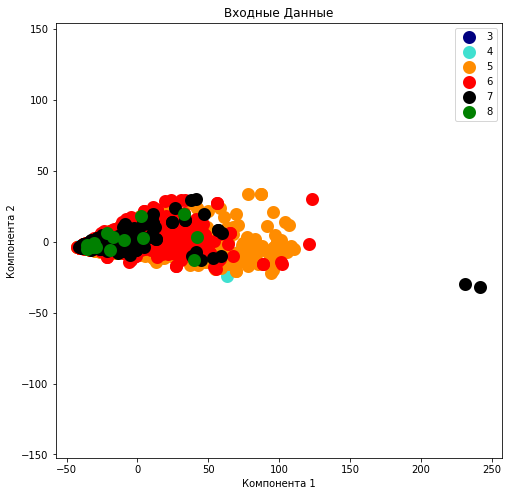

In [209]:
Drawing_component (Wine_pca,0,1, "Входные Данные", "Компонента 1", "Компонента 2")

In [210]:
def Drawing_3D_component (Data_wine_val, a,b,c,d,f,e, o, p, k):
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=a, azim=b)
    colors = ['navy', 'turquoise', 'darkorange','red','black',
         'green','yellow','purple','grey']
    
    for name, label in [('3', 3), ('4', 4), ('5', 5),('6', 6), ('7', 7), ('8', 8)]:
        ax.text3D(Data_wine_val[quality == label, c].mean(),
                  Data_wine_val[quality == label, d].mean() + 1.0,
                  Data_wine_val[quality == label, f].mean(), name,
                  horizontalalignment='center')
    for i in [3,4,5,6,7,8]:
        ax.scatter(Data_wine_val[quality==i,c], 
                   Data_wine_val[quality==i,d], 
                   Data_wine_val[quality==i,f], c=colors[i], s=50, cmap=plt.cm.spring, alpha=1, edgecolor='black')
    ax.set_xlabel(o)
    ax.set_ylabel(p)
    ax.set_zlabel(k)
    plt.title(e)

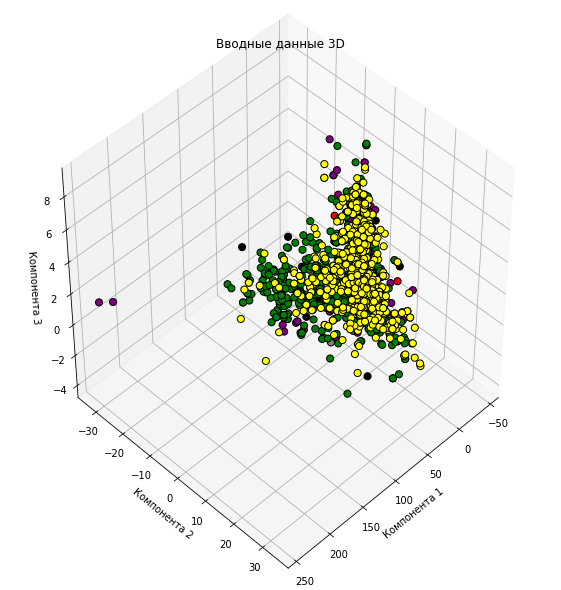

In [211]:
Drawing_3D_component (Wine_pca, 45, 45, 0,1,2, "Вводные данные 3D", "Компонента 1", "Компонента 2", "Компонента 3")

Из графиков видно, что данные плохо разбиваются по классам, произошло практически только смещение, попробуем применить следующий метод

# FactorAnalysis

Раннее мы считаль, что в РСА шум постоянен по осям, теперь избавимся от этой предпосылки

In [212]:
Factor= FactorAnalysis(n_components=10)
Wine_Factor = Factor.fit_transform(Data_wine_val) 

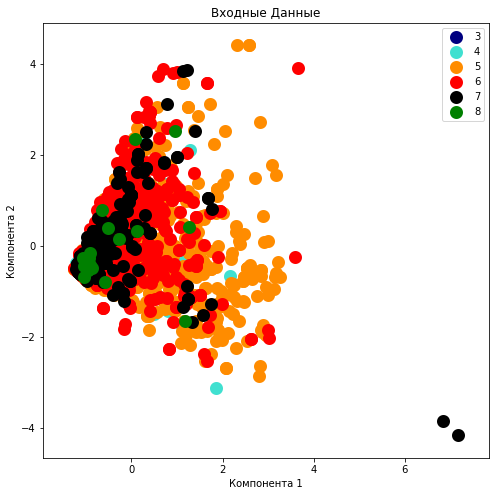

In [213]:
Drawing_component (Wine_Factor,0,1, "Входные Данные", "Компонента 1", "Компонента 2")

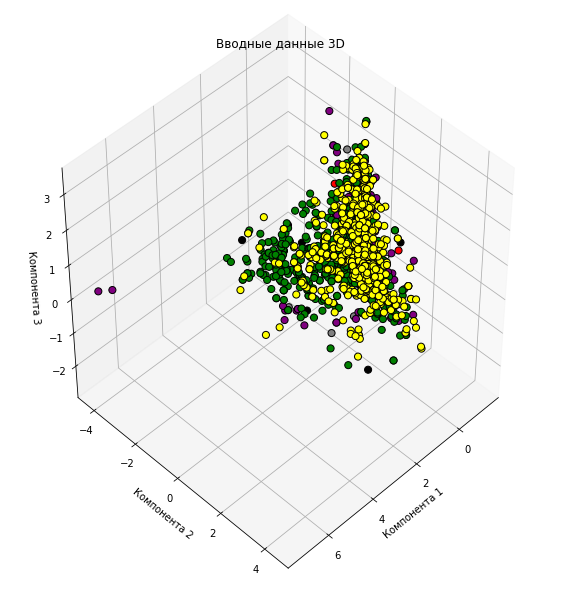

In [214]:
Drawing_3D_component (Wine_Factor, 45, 45, 0,1,2, "Вводные данные 3D", "Компонента 1", "Компонента 2", "Компонента 3")

FactorAnalysis не помог лучше разбить данные. Данные так же находятся в одной кучи.Применим следующий способ

# Kernel PCA

В данном случае данные проецируются на искривленную поверхность

In [235]:
kpc= KernelPCA(n_components=10,kernel='rbf', gamma=0.5)
Wine_kpc = kpc.fit_transform(Data_wine_val) 
print(kpc.lambdas_)

[11.98136302 10.17919107  8.64978094  8.2350317   8.10984873  7.82152657
  7.12036044  6.82943364  6.58842206  6.45994775]


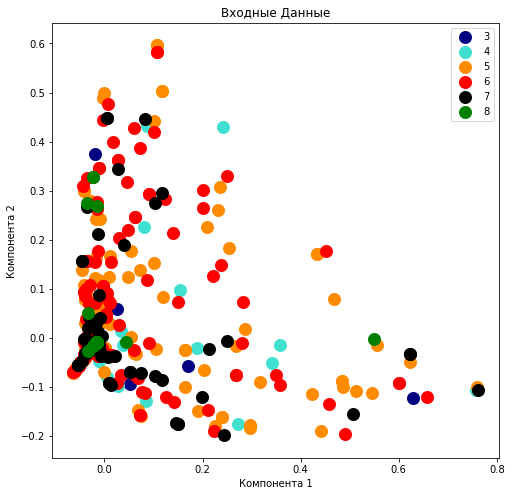

In [216]:
Drawing_component (Wine_kpc,0,1, "Входные Данные", "Компонента 1", "Компонента 2")

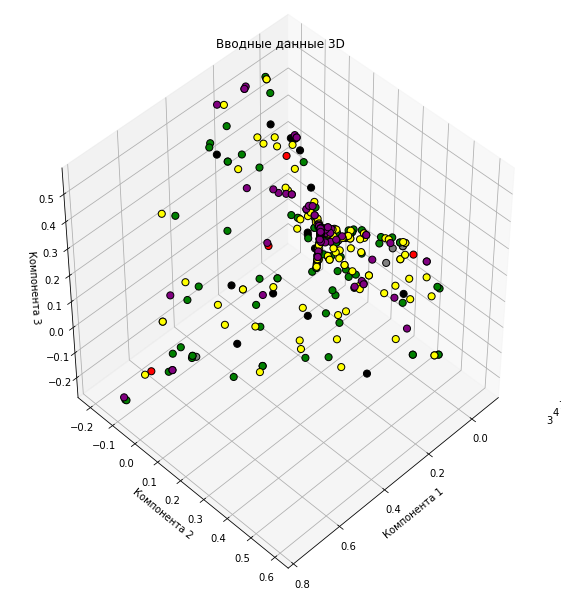

In [217]:
Drawing_3D_component (Wine_kpc, 45, 45, 0,1,2, "Вводные данные 3D", "Компонента 1", "Компонента 2", "Компонента 3")

Видно из трехмерной проекции что метод Kernel PCA смог в какой то степени разбить данные

# FastICA

Это алгоритм, который находит направления в пространстве признаков, соответствующие проекциям с высокой негауссовостью.

In [218]:
ica= FastICA(n_components=10,algorithm='deflation',random_state=0)
Wine_ica = ica.fit_transform(Data_wine_val) 

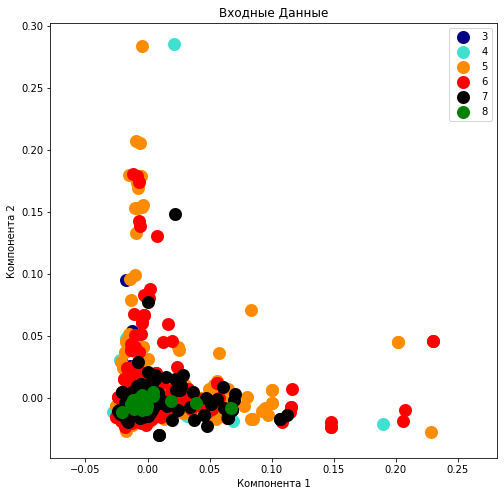

In [219]:
Drawing_component (Wine_ica,0,1, "Входные Данные", "Компонента 1", "Компонента 2")

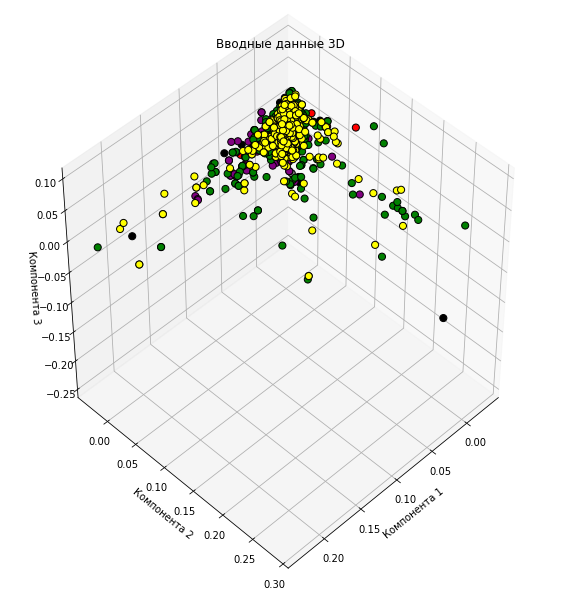

In [220]:
Drawing_3D_component (Wine_ica, 45, 45, 0,1,2, "Вводные данные 3D", "Компонента 1", "Компонента 2", "Компонента 3")

FastICA как и остальные методы - плохо справился со своей задачей 

Перейдем к обучению моделей, посмотрим что получится 

# Обучение

Ниже приведен обучающий набор данных

In [221]:
Data_wine_val
Wine_pca
Wine_Factor
Wine_kpc
Wine_ica

array([[-1.39367197e-02, -1.01719925e-02,  9.90298937e-03, ...,
         4.27860063e-04,  1.20279151e-02,  2.24332855e-02],
       [ 2.30124889e-03,  2.93614685e-03, -2.75783385e-02, ...,
         1.96029770e-02, -2.32486070e-03,  1.67242532e-03],
       [-4.17983777e-03, -6.32183867e-05, -1.83173890e-02, ...,
         9.17276762e-03,  1.34545091e-02,  1.52672570e-03],
       ...,
       [ 1.01633478e-03, -2.65479674e-03, -1.45374068e-02, ...,
        -2.52392792e-02, -3.27886024e-02,  9.53198234e-03],
       [-6.31809561e-03, -2.65957013e-03, -1.59786194e-03, ...,
        -2.43419500e-02, -4.60855280e-02,  1.77522556e-02],
       [ 2.40591880e-02, -5.62510718e-03,  7.00176766e-04, ...,
        -7.40619460e-02, -6.51163163e-03,  3.18618947e-03]])

обучение

In [222]:
def learning( clf, data, y, k, a):
    n = data.shape[0]
    prognoz_sum=0
    for i in range(k):
        perm = np.random.permutation( n )
        tr_n = int(0.85 * n)
        train = perm[ :tr_n ]
        valid = perm[ tr_n: ]
        train_dig = data[ train ]
        train_lab = y[ train ]
        valid_dig = data[ valid ]
        valid_lab = y[ valid ]
        clf.fit( train_dig, train_lab )
        prognoz=sum( clf.predict( valid_dig ) == valid_lab )/valid_lab.shape[0]
        prognoz_sum+=prognoz
    print(a, "=",prognoz_sum/k)
    return prognoz_sum/k

Применим Метод Случайный Лес 

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
clf=RandomForestClassifier(n_estimators=15, random_state=0)
Learn=learning(clf, Data_wine_val, quality, 100, "Вводные данные")
Learn=learning(clf, Wine_pca, quality, 100, "pca данные")
Learn=learning(clf, Wine_Factor, quality, 100, "Factor данные")
Learn=learning(clf, Wine_kpc, quality, 100, "kpc данные")
Learn=learning(clf, Wine_ica, quality, 100, "ica данные")

Вводные данные = 0.6635833333333336
pca данные = 0.6627916666666664
Factor данные = 0.6383333333333334
kpc данные = 0.5623749999999998
ica данные = 0.6629166666666667


Модель лучше обучилась на данных -- Вводные данные -- 66,36%

Прмименим Метод Гридиентного Бустинга 

In [225]:
from sklearn.ensemble import GradientBoostingClassifier 

In [226]:
clf=GradientBoostingClassifier(n_estimators=10, random_state=0, max_depth=6,learning_rate=0.1)
Learn=learning(clf, Data_wine_val, quality, 100, "Вводные данные")
Learn=learning(clf, Wine_pca, quality, 100, "pca данные")
Learn=learning(clf, Wine_Factor, quality, 100, "Factor данные")
Learn=learning(clf, Wine_kpc, quality, 100, "kpc данные")
Learn=learning(clf, Wine_ica, quality, 100, "ica данные")

Вводные данные = 0.6284166666666665
pca данные = 0.6314583333333335
Factor данные = 0.5997916666666668
kpc данные = 0.5254583333333331
ica данные = 0.6198333333333332


Модель лучше обучилась на данных --  pca данные -- 63,15%

Применим Метод Дерево Решений 

In [228]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
clf = DecisionTreeClassifier(max_depth=10)
Learn=learning(clf, Data_wine_val, quality, 100, "Вводные данные")
Learn=learning(clf, Wine_pca, quality, 100, "pca данные")
Learn=learning(clf, Wine_Factor, quality, 100, "Factor данные")
Learn=learning(clf, Wine_kpc, quality, 100, "kpc данные")
Learn=learning(clf, Wine_ica, quality, 100, "ica данные")

Вводные данные = 0.5864166666666665
pca данные = 0.5780416666666667
Factor данные = 0.564083333333333
kpc данные = 0.5080833333333333
ica данные = 0.5957499999999999


Модель лучше обучилась на данных --  ica данные -- 59,57%

Применим Метод Опорных Векторов 

In [230]:
from sklearn import svm

In [231]:
clf = svm.SVC( kernel = 'rbf', gamma=0.5 , C=5)
Learn=learning(clf, Data_wine_val, quality, 100, "Вводные данные")
Learn=learning(clf, Wine_pca, quality, 100, "pca данные")
Learn=learning(clf, Wine_Factor, quality, 100, "Factor данные")
Learn=learning(clf, Wine_kpc, quality, 100, "kpc данные")
Learn=learning(clf, Wine_ica, quality, 100, "ica данные")

Вводные данные = 0.5824999999999999
pca данные = 0.583708333333333
Factor данные = 0.5749166666666667
kpc данные = 0.4283333333333335
ica данные = 0.5680000000000003


Модель лучше обучилась на данных --  pca данные -- 58,37%

Применим Метод Близжайшего соседа

In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [233]:
clf = KNeighborsClassifier(n_neighbors=1)
Learn=learning(clf, Data_wine_val, quality, 100, "Вводные данные")
Learn=learning(clf, Wine_pca, quality, 100, "pca данные")
Learn=learning(clf, Wine_Factor, quality, 100, "Factor данные")
Learn=learning(clf, Wine_kpc, quality, 100, "kpc данные")
Learn=learning(clf, Wine_ica, quality, 100, "ica данные")

Вводные данные = 0.5723750000000001
pca данные = 0.5672916666666665
Factor данные = 0.6207916666666664
kpc данные = 0.5410416666666666
ica данные = 0.6261666666666668


Модель лучше обучилась на данных -- ica данные --  62,62%

# Вывод

Из выше приведенных вычислений, на основе моделей обучения

можно сделать вывод, что Метод Случайный Лес показывает наиболее точные результаты

относительно других моделей -- 66,36%